# Developing "Momentum" Trading Stradegy

# import relevant packages

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

# yahoo finance API

In [2]:
import yfinance as yf
import yfinance as yfin
yfin.pdr_override()

In [3]:
gld = pdr.DataReader(name='GLD', data_source = 'yahoo') #optional start and end parameters, w/o it will take 5 years 

In [4]:
gld.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-08-22,127.919998,127.449997,127.629997,127.779999,8627200,127.779999
2016-08-23,128.220001,127.610001,128.139999,127.760002,9038500,127.760002
2016-08-24,126.970001,126.300003,126.919998,126.339996,13539700,126.339996
2016-08-25,126.309998,125.959999,125.980003,126.230003,5926300,126.230003
2016-08-26,128.110001,125.820000,126.879997,126.050003,17967700,126.050003


In [5]:
day = np.arange(1, len(gld) + 1) #create an array that is a day counter to keep track of what day in time series at 
gld['day'] = day #add array to data frame 
gld.head()

,High,Low,Open,Close,Volume,Adj Close,day
Date,,,,,,,
2016-08-22,127.919998,127.449997,127.629997,127.779999,8627200,127.779999,1
2016-08-23,128.220001,127.610001,128.139999,127.760002,9038500,127.760002,2
2016-08-24,126.970001,126.300003,126.919998,126.339996,13539700,126.339996,3
2016-08-25,126.309998,125.959999,125.980003,126.230003,5926300,126.230003,4
2016-08-26,128.110001,125.820000,126.879997,126.050003,17967700,126.050003,5


In [6]:
gld.drop(columns=['Volume','Adj Close'], inplace=True)

In [7]:
gld = gld[['day','Open','High','Low','Close']] #to rearrange columns make copy of df in correct order 
gld.head()

,day,Open,High,Low,Close
Date,,,,,
2016-08-22,1,127.629997,127.919998,127.449997,127.779999
2016-08-23,2,128.139999,128.220001,127.610001,127.760002
2016-08-24,3,126.919998,126.970001,126.300003,126.339996
2016-08-25,4,125.980003,126.309998,125.959999,126.230003
2016-08-26,5,126.879997,128.110001,125.820000,126.050003


In [8]:
gld.info() #take look at the form of the data **also tells how many observations and data types**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2016-08-22 to 2021-08-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     1259 non-null   int32  
 1   Open    1259 non-null   float64
 2   High    1259 non-null   float64
 3   Low     1259 non-null   float64
 4   Close   1259 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 54.1 KB


# add data / transform data

# adding moving averages to the dataframe

In [9]:
gld['9-day'] = gld['Close'].rolling(9).mean() 
gld['21-day'] = gld['Close'].rolling(21).mean() #implies we have some type of look athead info so move foward one day 
gld[20:25] #implies we already know closing price as the day starts 

,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2016-09-20,21,125.309998,125.589996,125.169998,125.440002,126.005555,126.340953
2016-09-21,22,126.330002,127.419998,125.959999,127.269997,125.970000,126.316667
2016-09-22,23,127.570000,128.199997,127.500000,127.570000,126.061111,126.307619
2016-09-23,24,127.599998,127.860001,127.430000,127.650002,126.178889,126.370001
2016-09-26,25,127.959999,128.039993,127.419998,127.550003,126.378889,126.432858


# add a signal column

In [10]:
#tells us when we will be in a trade long or short 
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal'])
gld.dropna(inplace=True)
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2016-09-20,21,125.309998,125.589996,125.169998,125.440002,126.005555,126.340953,-1
2016-09-21,22,126.330002,127.419998,125.959999,127.269997,125.970000,126.316667,-1
2016-09-22,23,127.570000,128.199997,127.500000,127.570000,126.061111,126.307619,-1
2016-09-23,24,127.599998,127.860001,127.430000,127.650002,126.178889,126.370001,-1
2016-09-26,25,127.959999,128.039993,127.419998,127.550003,126.378889,126.432858,-1


# calculate instaneous returns/systems returns

In [11]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld.signal.diff()
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2016-09-20,21,125.309998,125.589996,125.169998,125.440002,126.005555,126.340953,-1,NaN,NaN,NaN
2016-09-21,22,126.330002,127.419998,125.959999,127.269997,125.970000,126.316667,-1,0.014483,-0.014483,0.0
2016-09-22,23,127.570000,128.199997,127.500000,127.570000,126.061111,126.307619,-1,0.002354,-0.002354,0.0
2016-09-23,24,127.599998,127.860001,127.430000,127.650002,126.178889,126.370001,-1,0.000627,-0.000627,0.0
2016-09-26,25,127.959999,128.039993,127.419998,127.550003,126.378889,126.432858,-1,-0.000784,0.000784,0.0


# plot trades on a time series

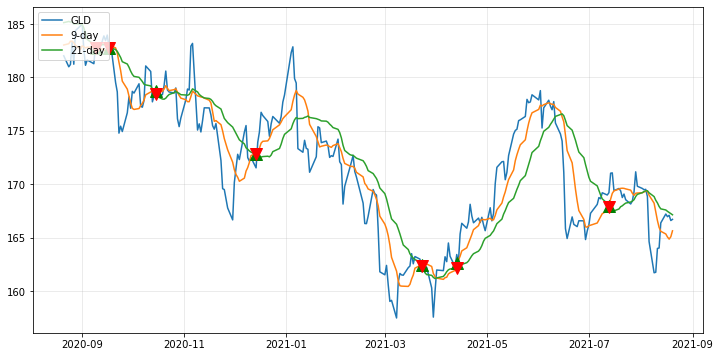

In [12]:
plt.rcParams['figure.figsize'] = 12,6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day'], label = '21-day')
plt.plot(gld[-252:].loc[gld.entry==2].index, gld[-252:]['9-day'][gld.entry==2], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.entry==2].index, gld[-252:]['21-day'][gld.entry==2], 'v',
        color = 'r', markersize = 12)
plt.legend(loc=2);

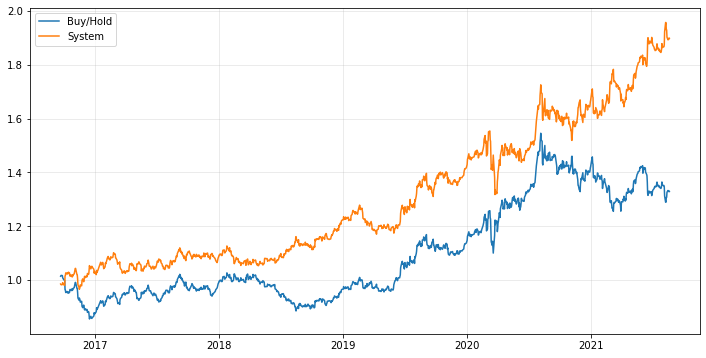

In [17]:
gld['system_return']= gld['signal'] * gld['return']
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [18]:
np.exp(gld['return'].cumprod()[-1]-1)

0.36787944117144233

In [19]:
np.exp(gld['system_return'].cumprod()[-1]-1)

0.36787944117144233